<a href="https://colab.research.google.com/github/EnesGokceDS/Data-Story_for_Capstone_Project/blob/master/Data_Story_for_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project 1: Data Story**

## **The Problem**
The prices of new cars in the industry are fixed by the manufacturer with some additional costs incurred by the Government in the form of taxes. So, customers buying a new car can be assured of the money they invest to be worthy. But due to the increased price of new cars and the incapability of customers to buy new cars due to the lack of funds, used car sales are on a global increase (Pal, Arora and Palakurthy, 2018). There is a need for a used car price prediction system to effectively determine the worthiness of the car using a variety of features. Even though there are websites that offer this service, their prediction method may not be the best. Besides, different models and systems may contribute to predicting a used car actual market value. It’s important to know their actual market value while both buying and selling.


In [0]:
import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join
# mount Google Drive
from os.path import expanduser
gd_path=join(expanduser("~"),'gd')
if not os.path.isdir(gd_path):
    try:
        # load Google Drive
        from google.colab import drive,files
        drive.mount('/drive')
        sp.call('ln -s /drive/My\ Drive '+gd_path, shell=True)
    except:
        print('unable to find Google Drive Folder')
os.chdir(gd_path+'/MachineLearning/car_data')
os.listdir('.')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


['craigslistVehicles_full.csv', 'cars_cleaned.csv']

In [0]:
import pandas as pd

In [0]:
cars = pd.read_csv('cars_cleaned.csv')
cars.head()
df=cars

## **Data Wrangling**
In this section, it will be discussed about how data cleaning and wrangling methods are applied on the craigslist used cars data file. 

Before making data cleaning, some explorations and data visualizations were applied on data set. This gave some idea and guide about how to deal with missing values and extreme values. After data cleaning, data exploration was applied again in order to understand cleaned version of the data.

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

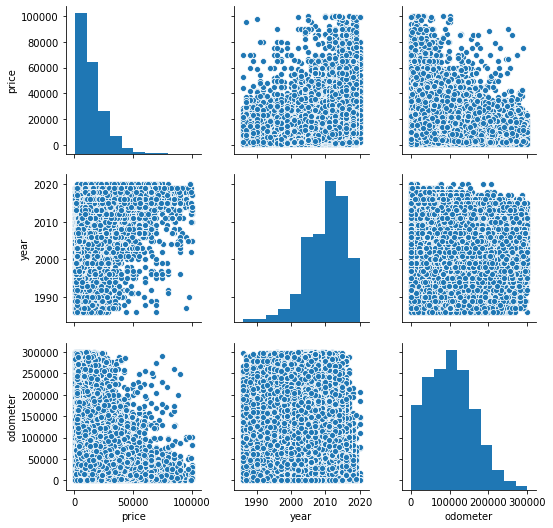

In [0]:
sns.pairplot(df)

### **Distribution of Car Prices**

#####By looking at below density plot, it can be observed that most of the used cars are less than $20000.  

#####In addition, we see that there are still considerable number of cars that is over $20k price. We can guess that all type of cars can be cheap or expensive. 

Text(0.5, 1.0, 'Distributuon of Car Prices')

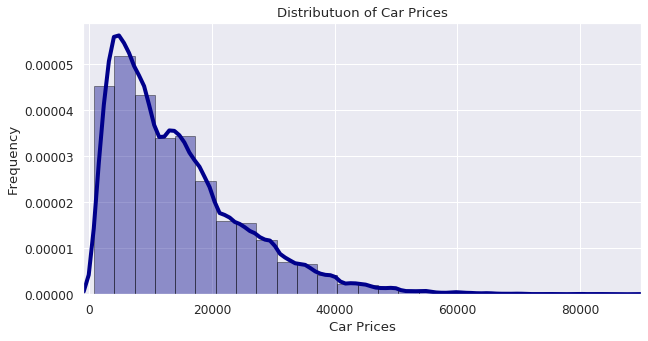

In [0]:
# Density Plot and Histogram of price of cars
plt.figure(figsize=(10,5))
sns.distplot(cars['price'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-1000,90000])
plt.xlabel('Car Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')

### **Examining type of the cars**

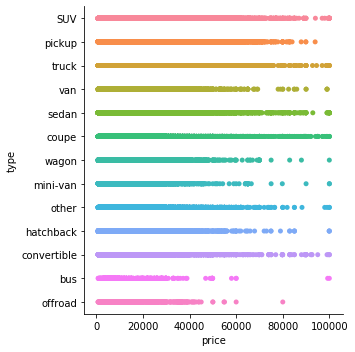

In [0]:
sns.catplot(x="price", y="type", jitter=False, data=df);

<Figure size 576x360 with 0 Axes>

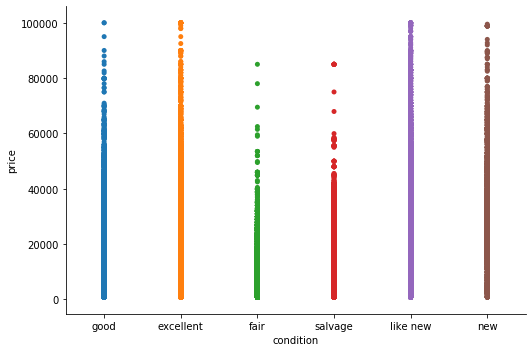

In [0]:
plt.figure(figsize=(8,5))
sns.catplot(x="condition", y="price", jitter=False, aspect=1.5, data=df, );

In [0]:
list(df)

['price',
 'year',
 'manufacturer',
 'make',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color']

In [0]:
pd.crosstab(index=df["type"],  # Make a crosstab
                      columns="count") 

col_0,count
type,
SUV,66495
bus,222
convertible,5709
coupe,13088
hatchback,8857
mini-van,5596
offroad,530
other,6168
pickup,37576


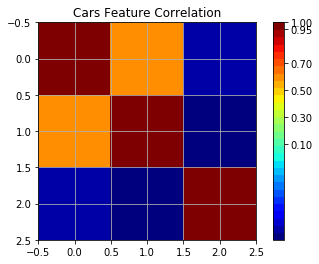

In [0]:
def correlation_matrix(cars):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(cars.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Cars Feature Correlation')
    #labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    #ax1.set_xticklabels(labels,fontsize=6)
    #ax1.set_yticklabels(labels,fontsize=6)
    
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.1,.3,.5,.70,.95,1])
    plt.show()

correlation_matrix(cars)

### **Importance of Odometer on Car Prices**

When buying a used car, people pay serious attention to the odometer value on the car. We can see that odometer changes the price of a car significantly. On the other hand, this does not mean that only low odometer cars are sold. Depending on the price, high odometer cars also have buyers. 

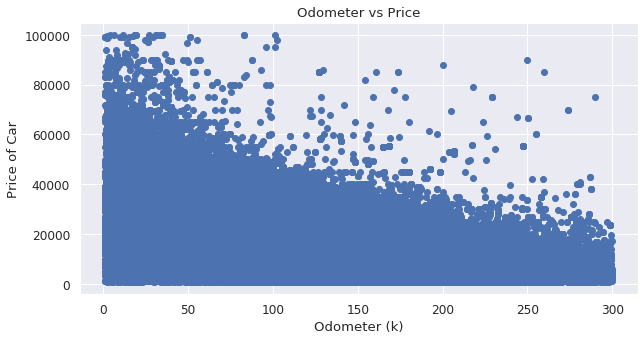

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(df['odometer']/1000, df['price'])
#plt.yticks(range(1, 20000))
plt.xlabel('Odometer (k)')
plt.ylabel('Price of Car')
plt.title('Odometer vs Price')
plt.show()

In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

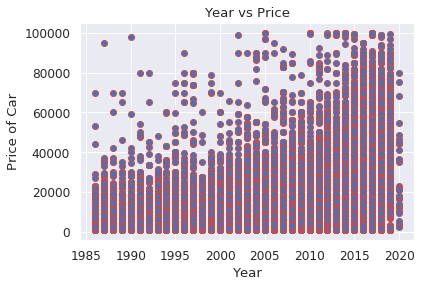

In [0]:
plt.scatter(df['year'], df['price'], edgecolors='r')
#plt.yticks(range(1, 20000))
plt.xlabel('Year')
plt.ylabel('Price of Car')
plt.title('Year vs Price')
plt.show()

Text(0.5, 0, 'Odometer (1000 Miles)')

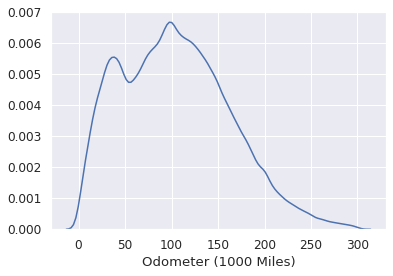

In [0]:
sns.distplot(df['odometer']/1000, hist=False)
plt.xlabel('Odometer (1000 Miles)')

Text(0.5, 1.0, 'Distribution of Odometer Values')

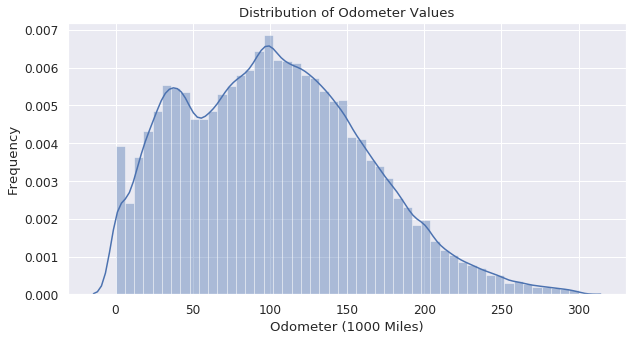

In [0]:
plt.figure(figsize=(10,5))
sns.distplot(df['odometer']/1000)
plt.xlabel('Odometer (1000 Miles)')
plt.ylabel('Frequency')
plt.title('Distribution of Odometer Values')

'Distribution of Odometer Values' plot tells that the most popular used cars are the ones that has odometer around 100k. Until 150k odometer, there are many cars on the market.  

### **Distribtion of Cars by Condition**

In [0]:
cabin_tab = pd.crosstab(index=df["condition"],  # Make a crosstab
                        columns="count")  
cabin_tab 

col_0,count
condition,
excellent,154718
fair,23200
good,96425
like new,68334
new,3976
salvage,34309


Text(0.5, 1.0, 'Distribtion of Cars by Condition')

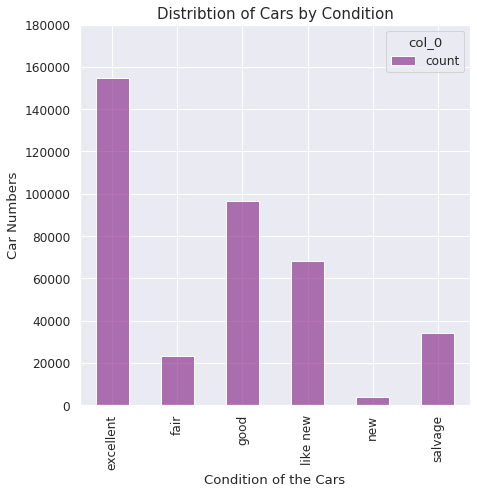

In [0]:
cabin_tab.plot(kind='bar', color = (0.5,0.1,0.5,0.6), figsize= (7,7))
plt.ylim(0,180000)
plt.xlabel('Condition of the Cars')
plt.ylabel('Car Numbers')
plt.title("Distribtion of Cars by Condition",fontsize=15)

By looking at distribution of car condition plot, it can be observed that excellent, like new, and good condition cars are the most popular cars in used car market. Salvage cars are following these three categories in popularity. Therefore, it is hard to make a strong estimate of a price of a car just by considering the type or condition of a car. But we can tell it certain condition cars are popular and higher chance to be sold. 

### **Examining Cars By Manufacturers**

Manufacturer of a car is another important variable on used car market. Ford and Chevrolet are one dominant manufacturer in North America. Toyota and Nissan follow the order as big manufacturers. It can be concluded that Japanese cars have a considerable share in used car market. However, American cars are still on demand and dominant. 

Text(0.5, 1.0, 'Distribution of Cars By Manufacturer')

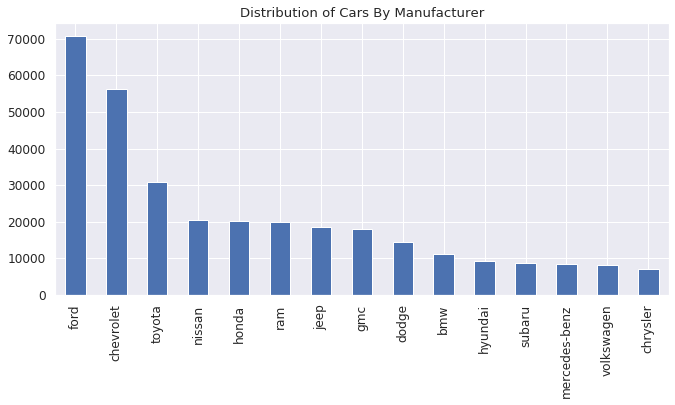

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.Series(df['manufacturer']).value_counts().head(15).plot(kind= 'bar',figsize=(11,5))
plt.title('Distribution of Cars By Manufacturer')




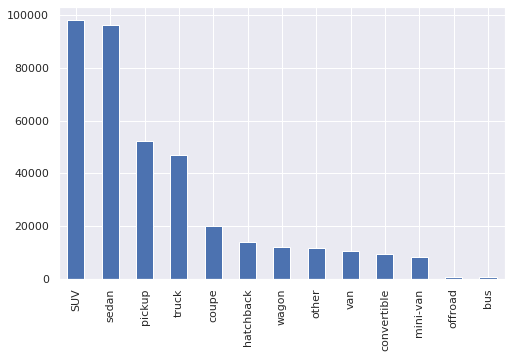

In [0]:
df.type.value_counts().plot(kind= 'bar',figsize=(8,5)) # This is a generalized formula of a bar chart

### **Examining Transmission**
Transmission is another feature that has a dominant sub category in the used car market. According below figures, automatic transmission has a strong effect on people’s preference on car. In Figure 6, it can be seen that after 2000, automatic transmission cars are in the increase. In 2009, it decreases. Global economic recession might have an impact on used car market and affect market. Another interesting trend is that after 2009, other transmission is on the increase. Its market share is still so low compared to automatic transmission, but it is still considerable. The increase in other transmission type can be caused by a couple reason. First possibility is that increase in continuously variable transmission (CVT). CVT is more environmentally friendly and fuel efficient. There might be a promotion for this kind of technology. Another possibility is that some seller on Craigslist website did not fill transmission section of the car information. The website might directly put them in the ‘other’ category. This also explains the increase in the ‘other’ category of transmission.

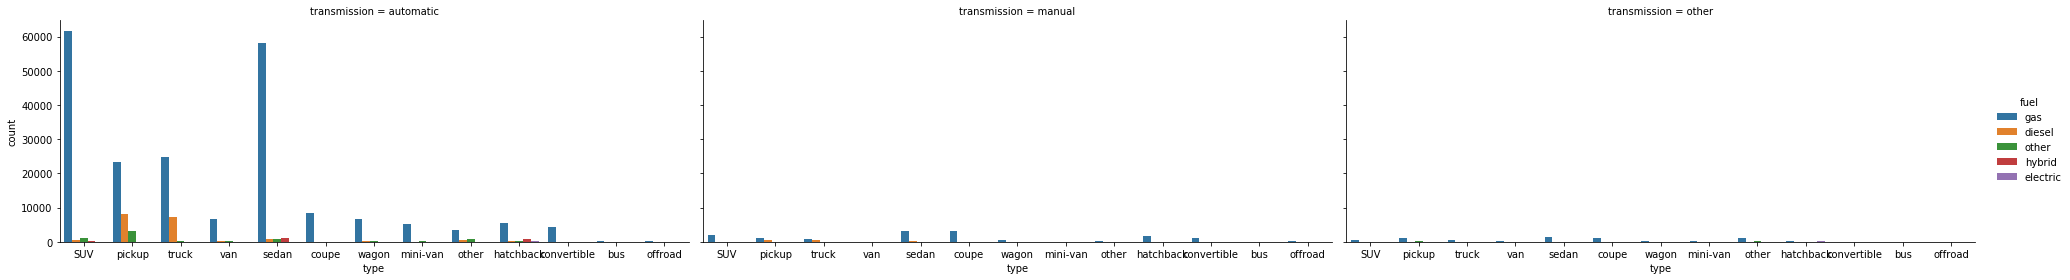

In [0]:
sns.catplot(x="type", hue="fuel", col="transmission",
                 data=df, kind="count",
               height=4, aspect= 2.3);
         

In [0]:
df.year.sort_values().tail(10) #Check the latest year

199658    2020.0
335286    2020.0
250742    2020.0
91576     2020.0
314404    2020.0
187854    2020.0
168475    2020.0
191835    2020.0
168596    2020.0
132154    2020.0
Name: year, dtype: float64

<Figure size 864x360 with 0 Axes>

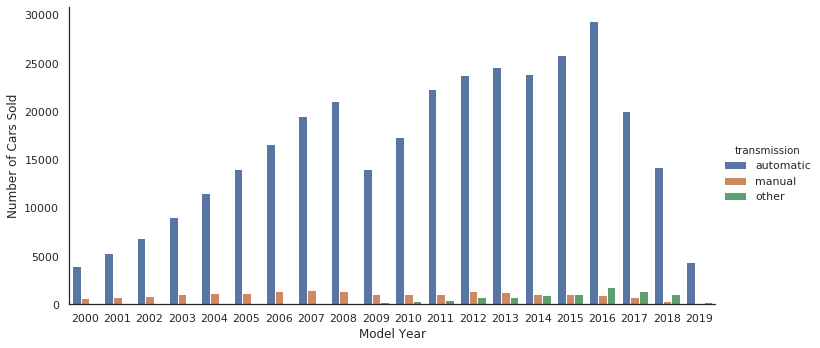

In [0]:
# 1. Enlarge the plot
plt.figure(figsize=(12,5))
sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot("year", data=cars, aspect=2, kind='count',
                       hue='transmission', order=range(2000, 2020))
    g.set_ylabels('Number of Cars Sold')
    g.set_xlabels('Model Year', )

### **Checking more feautures with various visuals**

In [0]:
list(cars)

['price',
 'year',
 'manufacturer',
 'make',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color']

In [0]:
trial= pd.crosstab(index=cars["drive"],  # Make a crosstab
                        columns="count") 
trial

col_0,count
drive,
4wd,175113
fwd,136163
rwd,69686


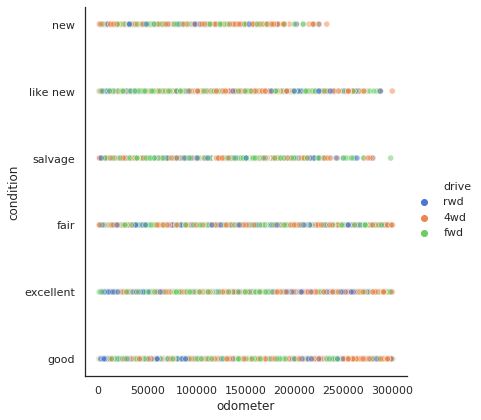

In [0]:
sns.set(style="white")
sns.relplot(x="odometer", y="condition", hue="drive", alpha=.5, palette="muted",
            height=6, data=cars)


<Figure size 864x360 with 0 Axes>

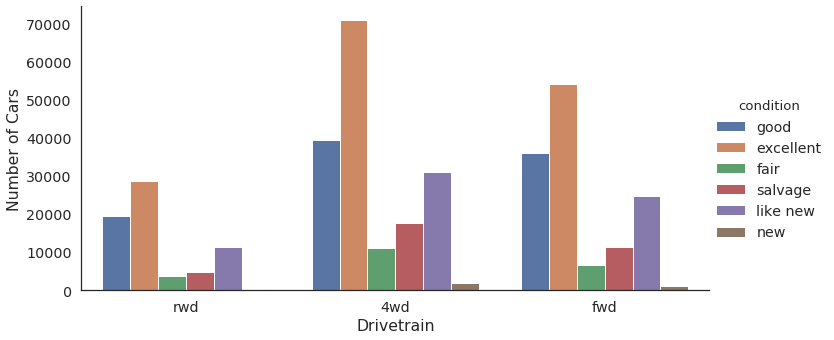

In [0]:
# 1. Enlarge the plot
plt.figure(figsize=(12,5))
sns.set(font_scale=1.3)


with sns.axes_style('white'):
    g = sns.catplot("drive", data=cars, aspect=2, kind='count', hue= 'condition')
    g.set_ylabels('Number of Cars')
    g.set_xlabels('Drivetrain')
    

While evaluating a car, it’s important to understand what affects it’s condition. 4wd drive cars more durable and reliable. It can be seen that 4wd cars are the most popular in terms of numbers. In the long run, they can keep their ability to run better compared to rwd and fwd drive train. 4wd has highest numbers of ‘excellent’, ‘like new’, and ‘good’ condition’ of cars. On the other hand, Note that compared to total number, it’s hard to say that 4wd cars higher rate of “excellent” and “like new” cars.

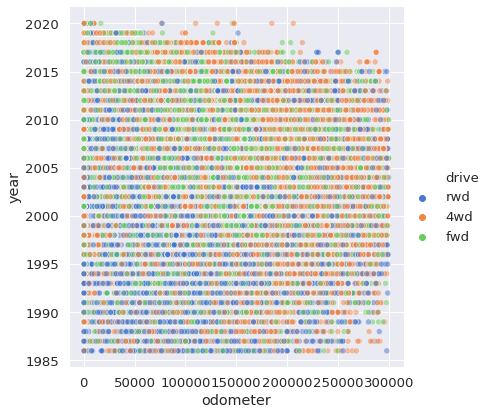

In [0]:
sns.relplot(x="odometer", y="year", hue="drive", alpha=.5, palette="muted",
            height=6, data=cars)  

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

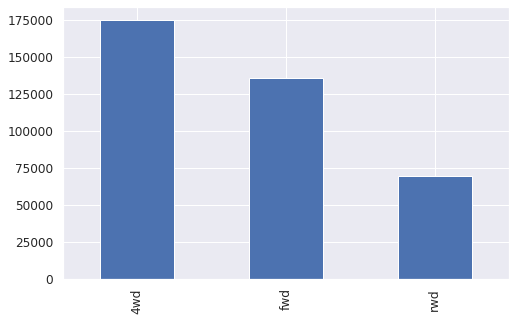

In [0]:
sns.set(font_scale=1.1)
df_categorical.drive.value_counts().plot(kind= 'bar',figsize=(8,5))

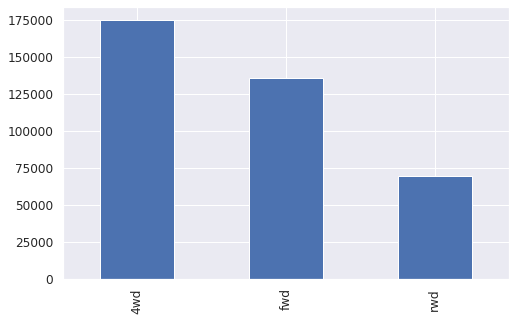

In [0]:
df_categorical.drive.value_counts().plot(kind= 'bar',figsize=(8,5))

In [0]:
for index in range(11):
  #fig, axes = plt.subplots(7,2, figsize=(8,5))
  df_categorical[index].value_counts().plot(kind='bar')

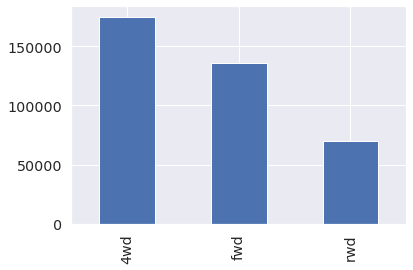

In [0]:
df_categorical.drive.value_counts().plot(kind='bar')

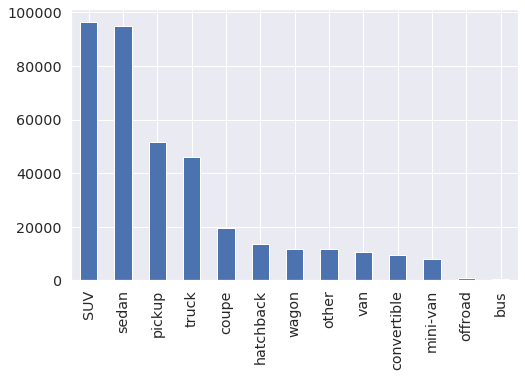

In [0]:
df.type.value_counts().plot(kind= 'bar',figsize=(8,5))

In [0]:
df_categorical= df.select_dtypes('object')
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380962 entries, 0 to 380961
Data columns (total 11 columns):
manufacturer    380962 non-null object
make            380962 non-null object
condition       380962 non-null object
cylinders       380962 non-null object
fuel            380962 non-null object
title_status    380962 non-null object
transmission    380962 non-null object
drive           380962 non-null object
size            380962 non-null object
type            380962 non-null object
paint_color     380962 non-null object
dtypes: object(11)
memory usage: 32.0+ MB


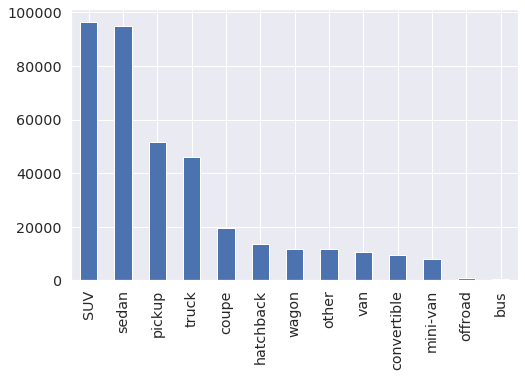

In [0]:
df.type.value_counts().plot(kind= 'bar',figsize=(8,5))



## **Conclusion**

By considering all these plot, we can see that buyers prefers 5-15 years old cars that are using gas, has automatic transmission and; sedan and SUV sizes. Besides, Ford, Chevy, Toyota, Honda and Nissan are popular used car brands. Most cars are labelled as “excellent” and “good” condition. Therefore, condition may not tell much about of the car. 

In order to understand what affects change in price of a used car, the relation between features available in the data sat will be examined by using inferential statistic methods in the next part of the Capstone Project. The primary assumption based on figures is that price must be affected by odometer and condition. There must be other features that affects price significantly. It will be investigated in the later phase of the study. 

**The first hypothesis:** 
H0: There is no significant relation between price and odometer of a car
Halt: There is a significant relation between price and odometer.

**The second hypothesis:**
H0: There is no significant relation between price and condition of a car
Halt: There is a significant relation between price and condition.

